In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
%matplotlib inline

In [23]:
data = pd.read_csv('ex2data1.txt',header=None,names=['Exam 1','Exam 2','Admitted'])
pos = np.where(data['Admitted'] == 1)
neg = np.where(data['Admitted'] == 0)
X = data.iloc[:,0:2]
y = data.iloc[:,2]
X = X.values
X = np.concatenate((np.ones((len(X),1)),X),axis = 1)
y = y.values
m = len(X)
#data = np.loadtxt('ex2data1.txt', delimiter=',')
theta = np.zeros(3)

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [25]:
def costFunction(theta,X,y):
    m = X.shape[0]
    h = np.squeeze(sigmoid(X.dot(theta)))
    return (1.0/m)*(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))

In [26]:
def gradient(theta,X,y):
    m = X.shape[0]
    h = np.squeeze(sigmoid(X.dot(theta)))
    return (1.0/m)*(X.T.dot(h-y))

In [27]:
opt_theta = opt.fmin_bfgs(f=costFunction, x0=theta, fprime=gradient, args=(X,y))
# opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/Users/Abinesh/Virtualenvs/CourseraML/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


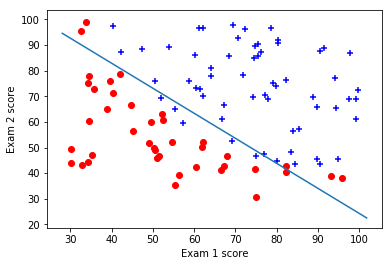

In [28]:
plt.scatter(X[pos,1],X[pos,2],marker='+',color='b')
plt.scatter(X[neg,1],X[neg,2],marker='o',color='r')
points = np.array([min(X[:,1])-2,max(X[:,1])+2])
plt.plot(points,(-1.0/opt_theta[1])*(opt_theta[0]+ opt_theta[2]*points))
plt.xlabel("Exam 1 score")
plt.ylabel('Exam 2 score')

In [29]:
def predict(theta,X):
    return (sigmoid(X.dot(theta)) >= 0.5)

p = predict(opt_theta,X)
print "Train Accuracy: "
print np.mean(p==y)*100

Train Accuracy: 
89.0


In [30]:
data = pd.read_csv('ex2data2.txt',header=None,names=['Exam 1','Exam 2','Admitted'])
pos = np.where(data['Admitted'] == 1)
neg = np.where(data['Admitted'] == 0)
X = data.iloc[:,0:2]
y = data.iloc[:,2]
X = X.values
y = y.values
m = len(X)
lam = 1.0

In [31]:
def mapFeature(X1,X2,degree):
    X1 = X1.reshape((X1.size,1))
    X2 = X2.reshape((X2.size,1))
    res = np.ones((len(X1),1))
    for i in xrange(1,degree+1):
        for j in xrange(0,i+1):
            res = np.concatenate((res,(X1**(i-j))*(X2**j)),axis=1)
    return res
    

X = mapFeature(X[:,0],X[:,1],6)

In [32]:
def costFunctionReg(theta,X,y,lam):
    h = np.squeeze(sigmoid(X.dot(theta)))
    return (1.0/m)*(-y.dot(np.log(h))-(1-y).dot(np.log(1-h))) + ((lam/(2*m))*(sum(theta[1:]**2)))

def gradientReg(theta,X,y,lam):
    h = np.squeeze(sigmoid(X.dot(theta)))
    return (1.0/m)*(X.T.dot(h-y)) + (lam/m)*np.concatenate(([0],theta[1:]))

In [33]:
theta = np.zeros(X.shape[1])
print "Cost Function at initial theta (all 0's) :"
print costFunctionReg(theta,X,y,lam)
print "Gradients:"
print gradientReg(theta,X,y,lam)

Cost Function at initial theta (all 0's) :
0.69314718056
Gradients:
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


In [34]:
print costFunctionReg(np.ones(X.shape[1]),X,y,10)
print gradientReg(np.ones(X.shape[1]),X,y,10)

2.020441535
[  3.46045074e-01   7.66061566e-02   1.10049993e-01   1.42117020e-01
   7.43991239e-03   1.59639814e-01   5.86463603e-02   2.36959523e-02
   1.75686317e-02   9.87226948e-02   8.87842709e-02   2.50975573e-03
   3.34819937e-02   1.09754196e-03   1.15203182e-01   5.04807645e-02
   1.02295113e-02   8.81865218e-03   1.50520786e-02   6.65581097e-03
   9.01066541e-02   6.48086550e-02   2.03989264e-03   1.42310951e-02
   5.73747746e-04   1.71609001e-02  -2.43784101e-04   9.75374635e-02]


In [35]:
opt_theta = opt.fmin_bfgs(f=costFunctionReg, x0=theta, fprime=gradientReg, args=(X,y,lam))
print opt_theta

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
[ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]


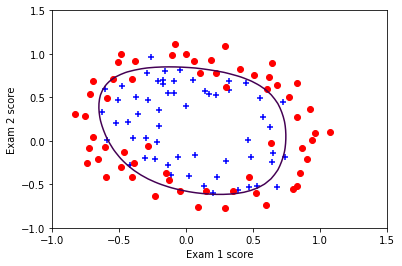

In [36]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (mapFeature(np.array(u[i]), np.array(v[j]),6).dot(opt_theta))
        
z = z.T

plt.scatter(X[pos,1],X[pos,2],marker='+',color='b')
plt.scatter(X[neg,1],X[neg,2],marker='o',color='r')
plt.xlabel("Exam 1 score")
plt.ylabel('Exam 2 score')

plt.contour(u,v,z,levels=[0])

In [37]:
p = predict(opt_theta,X)
print "Train Accuracy: "
print np.mean(p==y)*100

Train Accuracy: 
83.0508474576
